## Data Exploration for Task 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

import subtask2scorer as task2

ModuleNotFoundError: No module named 'subtask2scorer'

In [ ]:
FRAMES = "frames_subtask2.txt"
CLASSES = task2.read_frame_list_from_file(FRAMES)

### Show number of labels per class for a given language and set

In [ ]:
LANGUAGES = ["en", "it", "ru", "fr", "ge", "po"]
DATASET = "train"
LABELS_FILE = "./data_folder/data/{language}/{dataset}-labels-subtask-2.txt"

In [10]:
# Returns number of samples for a given language and dataset
def get_sample_count(language, dataset):
    gold_labels = task2._read_csv_input_file(LABELS_FILE.format(language=language, dataset=dataset))
    return len(gold_labels)

In [11]:
# Returns class count for a given language and dataset
def get_classes_lang(language, dataset):
    gold_labels = task2._read_csv_input_file(LABELS_FILE.format(language=language, dataset=dataset))
    _, gold_values = task2._extract_matching_lists(gold_labels, gold_labels)

    # Transform labels to binary array
    mlb = MultiLabelBinarizer()
    mlb.fit_transform([CLASSES])
    classes = mlb.classes_
    gold_values = mlb.transform(gold_values)
    class_sum = gold_values.sum(axis=0)

    df = pd.DataFrame(dict(labels=classes, sums=class_sum))
    return df

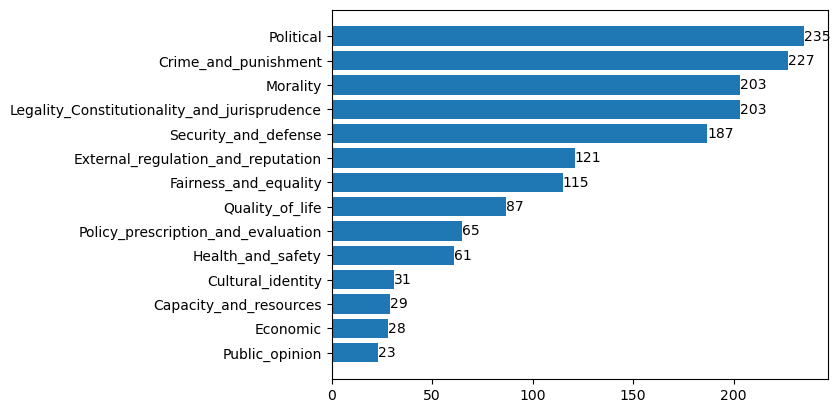

In [12]:
# Get class count for a language
df = get_classes_lang("en", DATASET)

# Plot bar chart
df_sorted = df.sort_values('sums')
bars = plt.barh('labels', 'sums', data=df_sorted)
plt.bar_label(bars)
plt.show()

### Show data per language

#### Show total data

In [13]:
lang_count = []
for l in LANGUAGES:
    lang_count.append(get_sample_count(l, DATASET))

lang_df = pd.DataFrame(dict(languages=LANGUAGES, sample_count=lang_count)).set_index('languages')

#### Show labelled data

In [14]:
tables = []
for l in LANGUAGES:
    df = get_classes_lang(l, DATASET)
    df['language'] = l
    tables.append(df)

counts = pd.concat(tables)

In [15]:
lang_df['labels'] = counts.groupby(['language']).sum()
lang_df['labels/samples (%)'] = lang_df['labels'] / lang_df['sample_count'] * 100
lang_df

,sample_count,labels,labels/samples (%)
languages,,,
en,433,1615,372.979215
it,227,860,378.854626
ru,143,360,251.748252
fr,158,474,300.000000
ge,132,567,429.545455
po,145,722,497.931034


### Show number of classes for each language

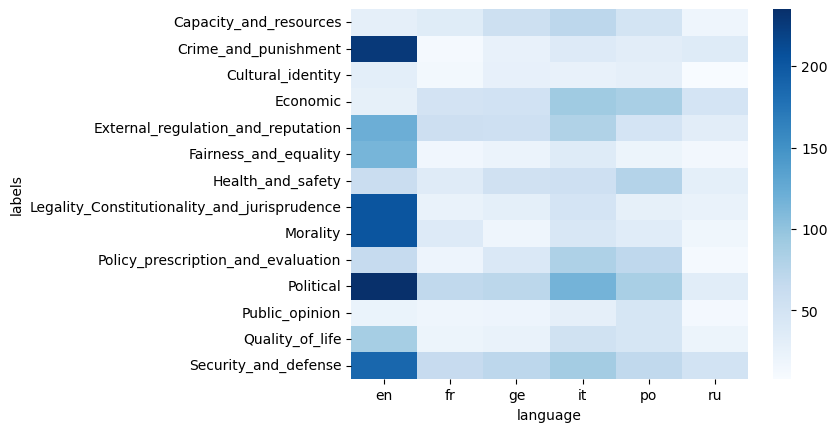

In [16]:
heatmap = counts.pivot("labels", "language", "sums")
sns.heatmap(heatmap, cmap='Blues')
plt.show()